In [48]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [49]:
pd.set_option('display.max_columns',200)

In [50]:
#Importing dataset
data = pd.read_csv('C:/Users/LENOVO/Downloads/water_potability.csv',encoding='ISO-8859-1')

In [51]:
data.head(5)

ph     Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.8904555  20791.31898  7.300211873  368.516441   
1  3.716080075  129.4229205  18630.05786  6.635245884         NaN   
2  8.099124189  224.2362594  19909.54173  9.275883603         NaN   
3  8.316765884  214.3733941  22018.41744  8.059332377  356.886136   
4  9.092223456  181.1015092  17978.98634  6.546599974  310.135738   

  Conductivity Organic_carbon Trihalomethanes    Turbidity  Potability  
0  564.3086542    10.37978308     86.99097046  2.963135381           0  
1  592.8853591    15.18001312     56.32907628  4.500656275           0  
2  418.6062131    16.86863693     66.42009251   3.05593375           0  
3  363.2665162     18.4365245     100.3416744  4.628770537           0  
4  398.4108134    11.55827944     31.99799273  4.075075425           0

In [52]:
data.shape

(3276, 10)

In [53]:
#let's take a peek at data columns
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [54]:
#let's look at the data types
data.dtypes

ph                  object
Hardness            object
Solids              object
Chloramines         object
Sulfate            float64
Conductivity        object
Organic_carbon      object
Trihalomethanes     object
Turbidity           object
Potability           int64
dtype: object

In [55]:
import re
def clean_symbols(value):
    if pd.notna(value):
        return re.sub(r'[^\d.]+', '', str(value))
    else:
        return value

# Apply the clean_symbols function to all columns in the DataFrame
for column in data.columns:
    data[column] = data[column].apply(clean_symbols)

# Convert columns to numeric data types
numeric_columns = data.columns  # Add other column names as needed
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Display the cleaned DataFrame
print(data)

            ph    Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.890456  20791.31898     7.300212  368.516441   
1     3.716080  129.422921  18630.05786     6.635246         NaN   
2     8.099124  224.236259  19909.54173     9.275884         NaN   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.1

In [56]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [10]:
output_file = r"C:\Users\HP\Downloads\dataset.csv"

# Export the DataFrame to a CSV file
data.to_csv(output_file, index=False)

print(f"Dataset has been exported to {output_file}.")

OSError: Cannot save file into a non-existent directory: 'C:\Users\HP\Downloads'

In [57]:
print("The Range of Values among different 10 columns")

print("Ph : {:.4f}".format(min(data['ph'])) + " - {:.4f}".format(max(data['ph'])))
print("Hardness : {:.4f}".format(min(data['Hardness'])) + " - {:.4f}".format(max(data['Hardness'])))
print("Solids : {:.4f}".format(min(data['Solids'])) + " - {:.4f}".format(max(data['Solids'])))
print("Chloramines : {:.4f}".format(min(data['Chloramines'])) + " - {:.4f}".format(max(data['Chloramines'])))
print("Sulfate : {:.4f}".format(min(data['Sulfate'])) + " - {:.4f}".format(max(data['Sulfate'])))
print("Conductivity : {:.4f}".format(min(data['Conductivity'])) + " - {:.4f}".format(max(data['Conductivity'])))
print("Organic Carbon : {:.4f}".format(min(data['Organic_carbon'])) + " - {:.4f}".format(max(data['Organic_carbon'])))
print("Trihalomethanes : {:.4f}".format(min(data['Trihalomethanes'])) + " - {:.4f}".format(max(data['Trihalomethanes'])))
print("Turbidity : {:.4f}".format(min(data['Turbidity'])) + " - {:.4f}".format(max(data['Turbidity'])))
print("Potability : {:.4f}".format(min(data['Potability'])) + " - {:.4f}".format(max(data['Potability'])))

The Range of Values among different 10 columns
Ph : nan - nan
Hardness : 47.4320 - 323.1240
Solids : 320.9426 - 61227.1960
Chloramines : 0.3520 - 10047.0505
Sulfate : 129.0000 - 481.0306
Conductivity : 181.4838 - 753.3426
Organic Carbon : 2.2000 - 91456.6541
Trihalomethanes : 0.7380 - 124.0000
Turbidity : 1.4500 - 6.7390
Potability : 0.0000 - 1.0000


In [58]:
data["Chloramines"].replace(10047.0505, 1.00470505, inplace=True)
data["Organic_carbon"].replace(25000.0005, 25, inplace=True)
data["Organic_carbon"].replace(91456.65413, 9.1456, inplace=True)

In [59]:
print("The Range of Values among different 10 columns")

print("Ph : {:.4f}".format(min(data['ph'])) + " - {:.4f}".format(max(data['ph'])))
print("Hardness : {:.4f}".format(min(data['Hardness'])) + " - {:.4f}".format(max(data['Hardness'])))
print("Solids : {:.4f}".format(min(data['Solids'])) + " - {:.4f}".format(max(data['Solids'])))
print("Chloramines : {:.4f}".format(min(data['Chloramines'])) + " - {:.4f}".format(max(data['Chloramines'])))
print("Sulfate : {:.4f}".format(min(data['Sulfate'])) + " - {:.4f}".format(max(data['Sulfate'])))
print("Conductivity : {:.4f}".format(min(data['Conductivity'])) + " - {:.4f}".format(max(data['Conductivity'])))
print("Organic Carbon : {:.4f}".format(min(data['Organic_carbon'])) + " - {:.4f}".format(max(data['Organic_carbon'])))
print("Trihalomethanes : {:.4f}".format(min(data['Trihalomethanes'])) + " - {:.4f}".format(max(data['Trihalomethanes'])))
print("Turbidity : {:.4f}".format(min(data['Turbidity'])) + " - {:.4f}".format(max(data['Turbidity'])))
print("Potability : {:.4f}".format(min(data['Potability'])) + " - {:.4f}".format(max(data['Potability'])))

The Range of Values among different 10 columns
Ph : nan - nan
Hardness : 47.4320 - 323.1240
Solids : 320.9426 - 61227.1960
Chloramines : 0.3520 - 13.1270
Sulfate : 129.0000 - 481.0306
Conductivity : 181.4838 - 753.3426
Organic Carbon : 2.2000 - 28.3000
Trihalomethanes : 0.7380 - 124.0000
Turbidity : 1.4500 - 6.7390
Potability : 0.0000 - 1.0000


In [60]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2784.000000  3276.000000   3275.000000  3276.000000  2495.000000   
mean      7.080766   196.369496  22015.542139     7.120430   333.775777   
std       1.594605    32.879761   8769.517230     1.586687    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.092665   176.850538  15665.106980     6.126099   307.699498   
50%       7.035894   196.967627  20933.512750     7.130299   333.073546   
75%       8.062251   216.667456  27334.162290     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.288365        66.396293     3.966786     0.103175  
std       80.824064        3.313658        16.175008     0.780382     0.304233  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.219418        66.622485     3.955028     0.000000  
75%      481.792305       16.559114        77.337473     4.500320     0.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [61]:
#Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2784 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3275 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [62]:
pd.isnull(data).sum()

ph                 492
Hardness             0
Solids               1
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [63]:
# Calculate the percentage of missing values for each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_data = pd.DataFrame({'Missing Percentage': missing_percentages})
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
print(missing_data)

                 Missing Percentage
Sulfate                   23.840049
ph                        15.018315
Trihalomethanes            4.945055
Solids                     0.030525
Hardness                   0.000000
Chloramines                0.000000
Conductivity               0.000000
Organic_carbon             0.000000
Turbidity                  0.000000
Potability                 0.000000


In [64]:
print('----------------------------------------')
print('      columns with missing value')
print('----------------------------------------')
print(missing_data[missing_data['Missing Percentage'] > 0])

----------------------------------------
      columns with missing value
----------------------------------------
                 Missing Percentage
Sulfate                   23.840049
ph                        15.018315
Trihalomethanes            4.945055
Solids                     0.030525


In [65]:
data['Solids'].fillna(data['Solids'].mean(), inplace=True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)
data['ph'].fillna(data['ph'].mean(), inplace=True)


In [66]:
#data.dropna()

In [67]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [68]:
# Find and display duplicate rows
duplicate_rows = data[data.duplicated(keep='first')]  
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


In [69]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

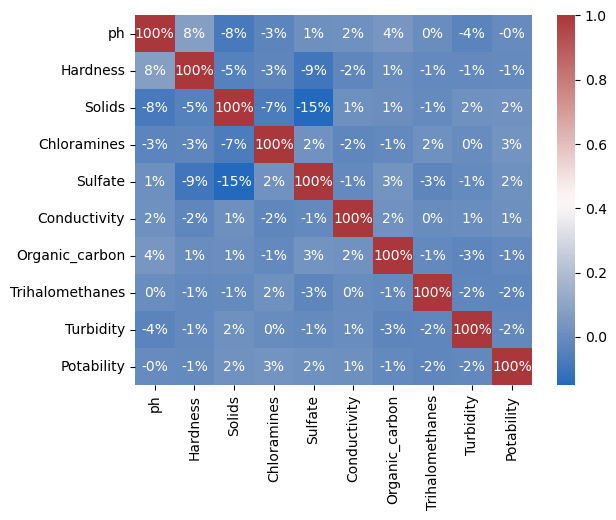

In [70]:
# Generate and Display Correlation Heatmap for Numeric Features
cmap = sns.color_palette('vlag', as_cmap=True)
sns.heatmap(data.corr(),annot=True,fmt='.0%', cmap=cmap)
plt.show()

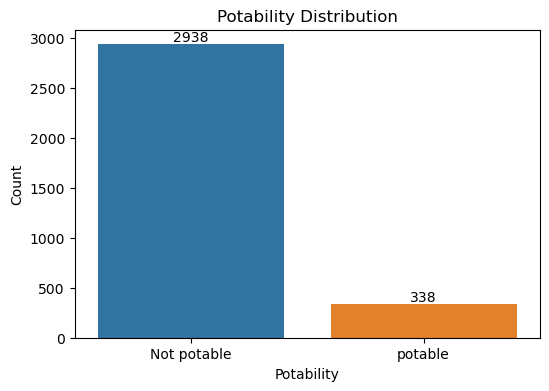

In [71]:
#Statute barrede status Distribution
plt.figure(figsize=(6,4))
ax=sns.countplot(data=data, x='Potability')
plt.title('Potability Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0,1], ['Not potable', 'potable'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [72]:
# Statue barred status Percentage
print('potable % is: ',data['Potability'].value_counts()[1]/len(data)*100,'%')
print('not potable % is: ',data['Potability'].value_counts()[0]/len(data)*100,'%')

potable % is:  10.317460317460316 %
not potable % is:  89.68253968253968 %


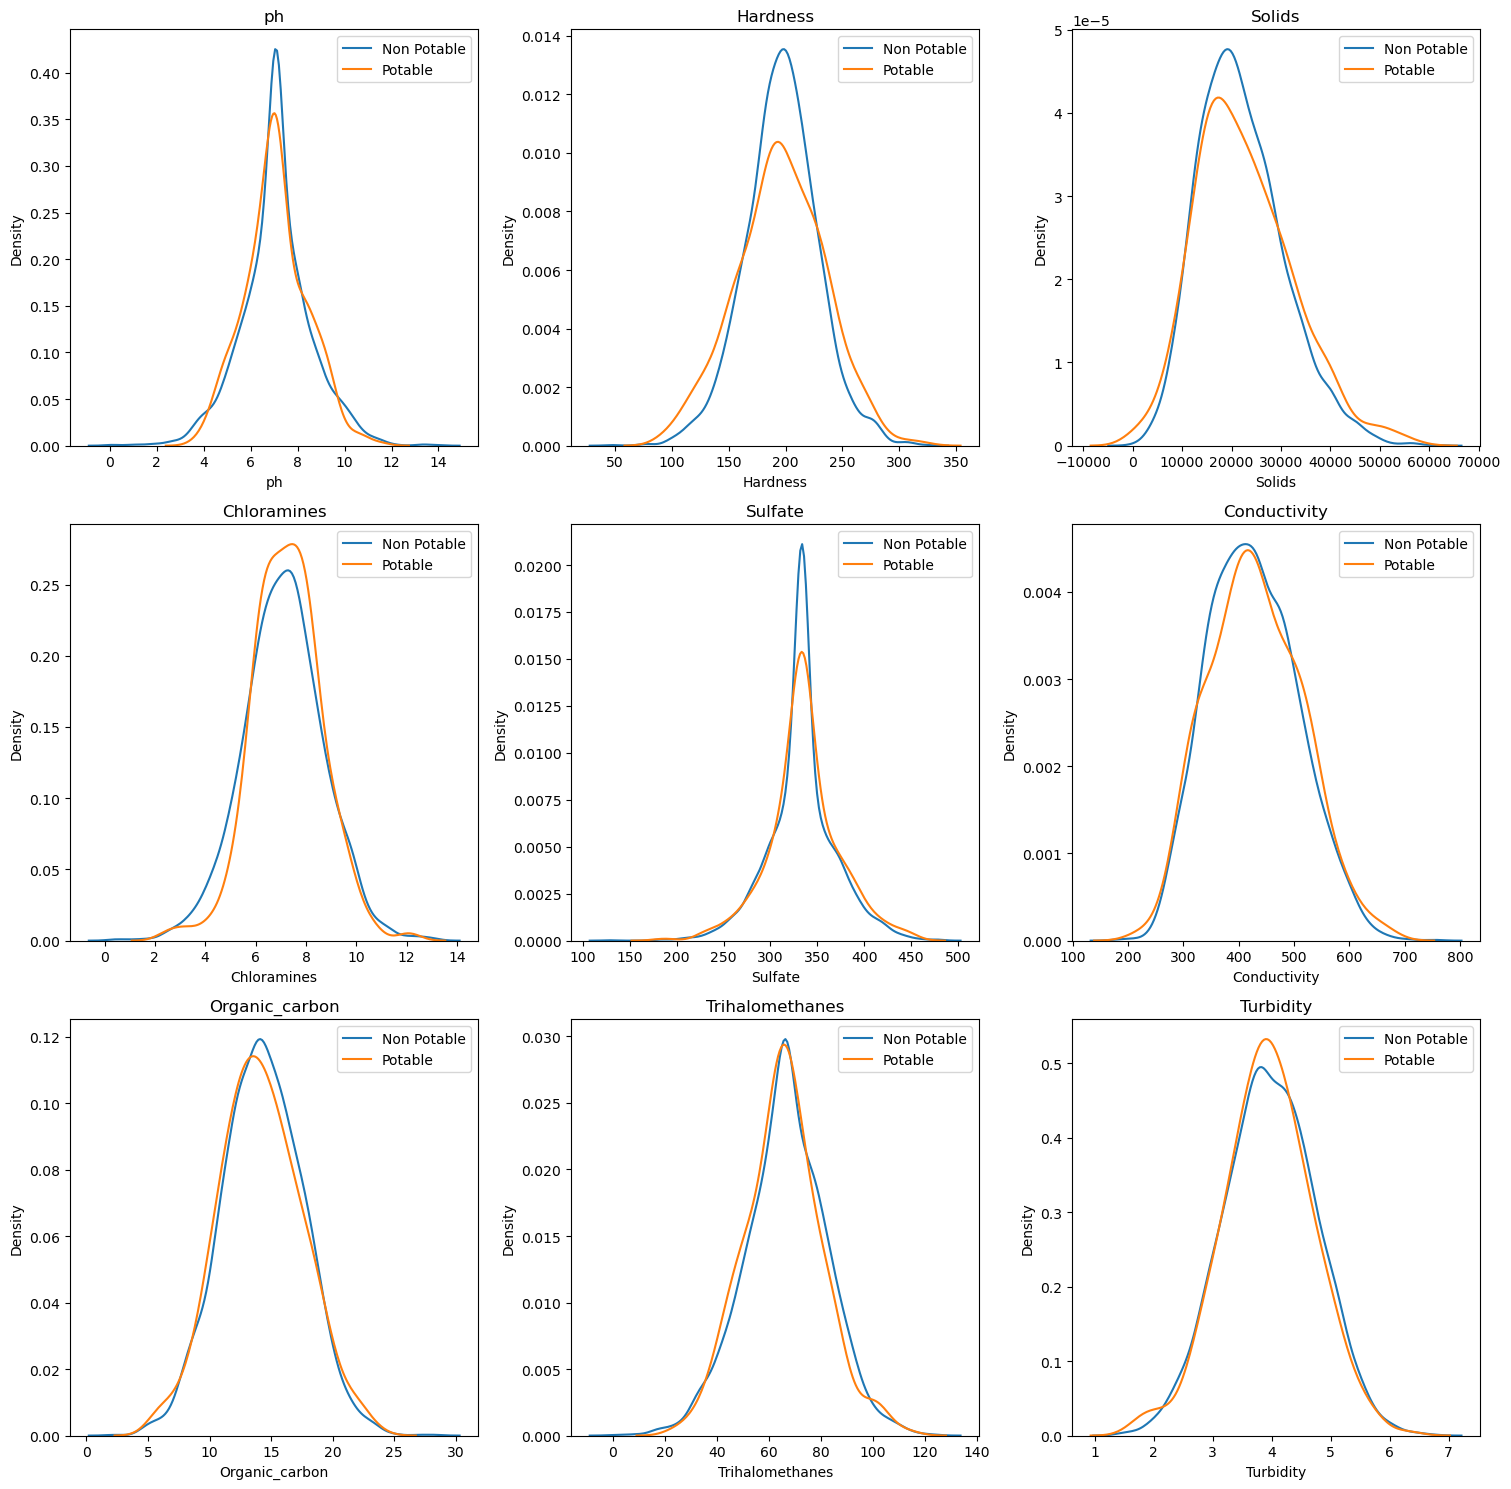

In [73]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize=(15,15))

for row, col in enumerate(data.columns[: 9]):
    # df.columns[: 9] because the 10th column is also "Potability"
    plt.subplot(3, 3, row + 1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

The Range of Values among different 10 columns


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


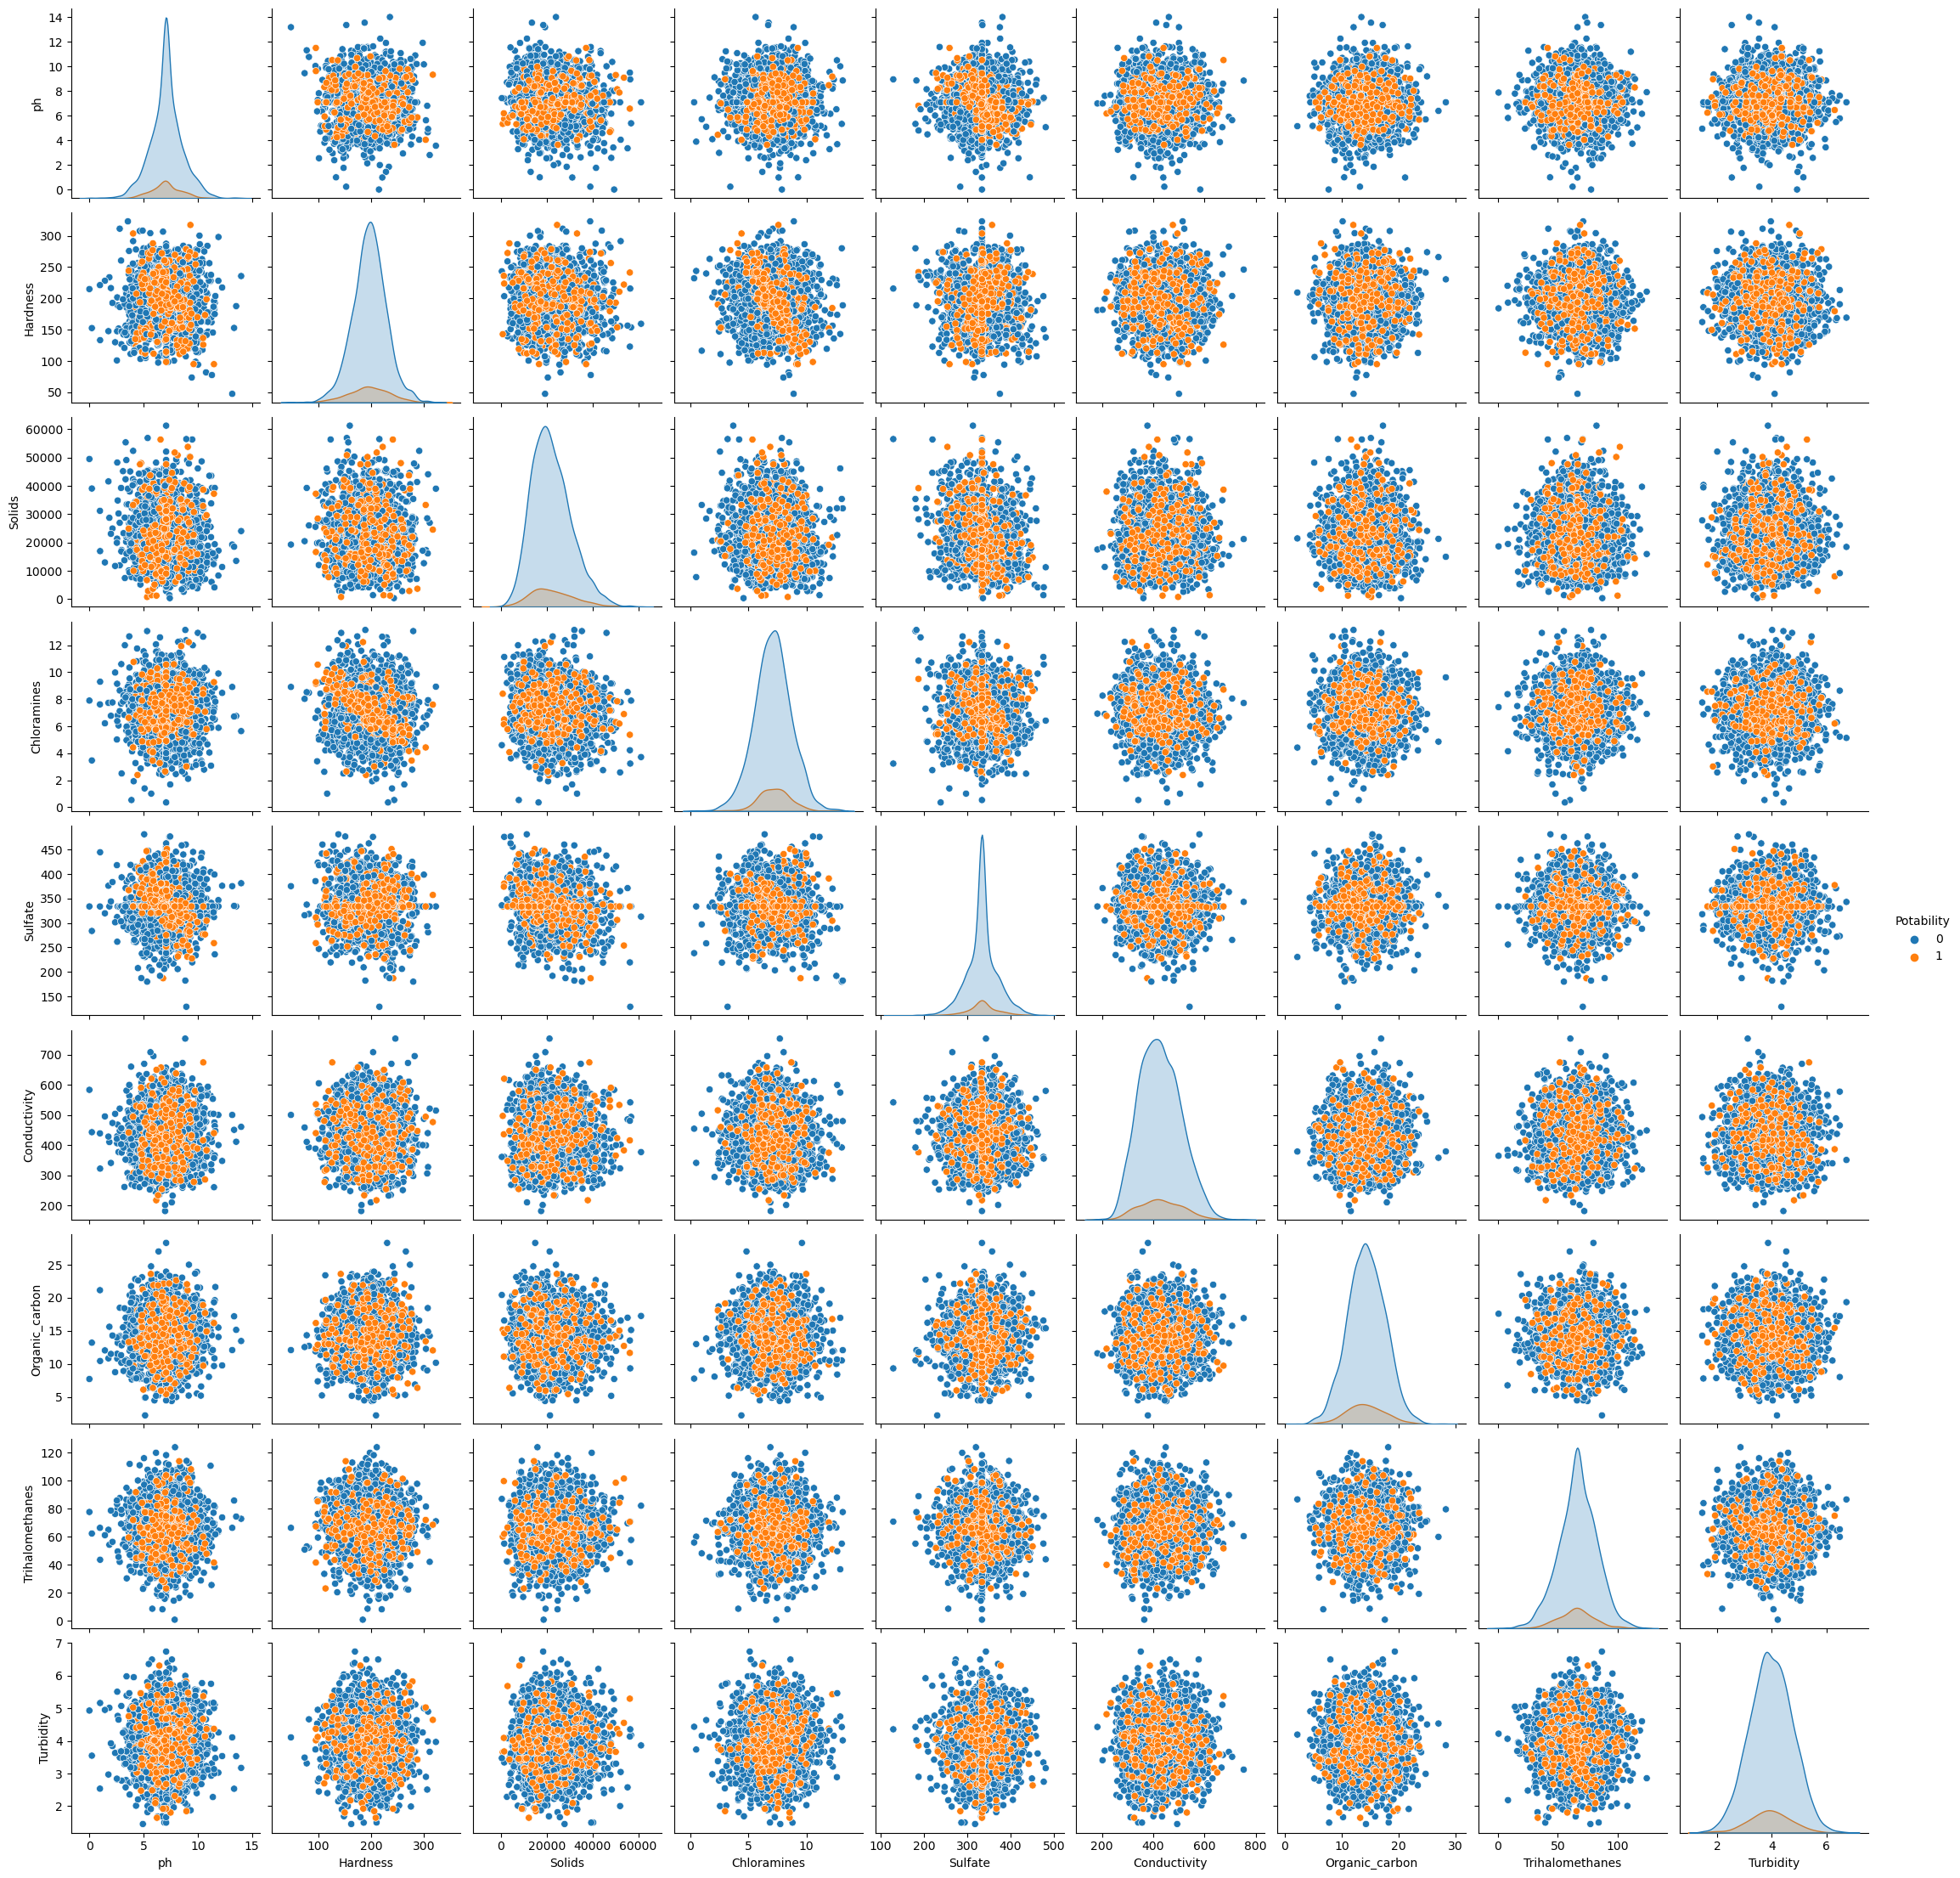

In [74]:
sns.pairplot(data,hue='Potability')


Quick Observation:

Potable water sample are always clustured in the middle of the plots.
A potable water sample has less ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes and Turbidity as compared to a not potable water

AttributeError: module 'seaborn' has no attribute 'title'

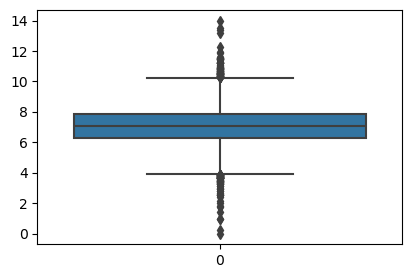

In [83]:
plt.figure(figsize=(16,14))
for i,col in enumerate(data.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=data[col])
    sns.title(col)
    sns.set_xlabel('Value')
    plt.tight_layout()

In [40]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

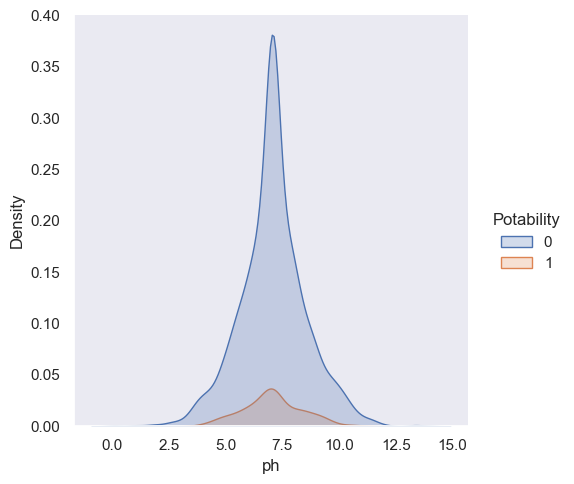

In [99]:
# Bivariate Analysis of ph with Potability

sns.displot(x=data['ph'],hue=data['Potability'],kind='kde',fill=True)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

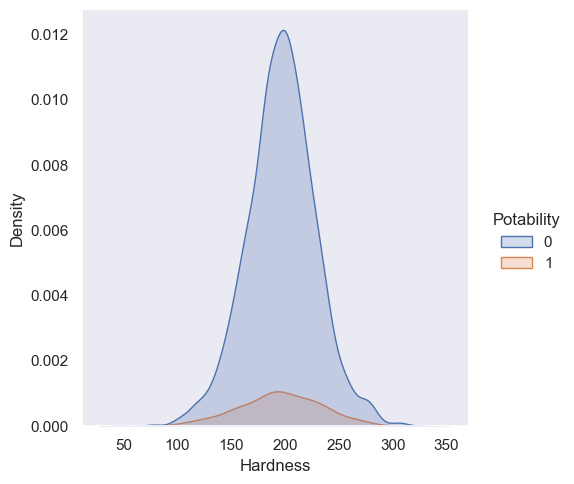

In [100]:
# Bivariate Analysis of Hardness with Potability

sns.displot(x=data['Hardness'],hue=data['Potability'],kind='kde',fill=True)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

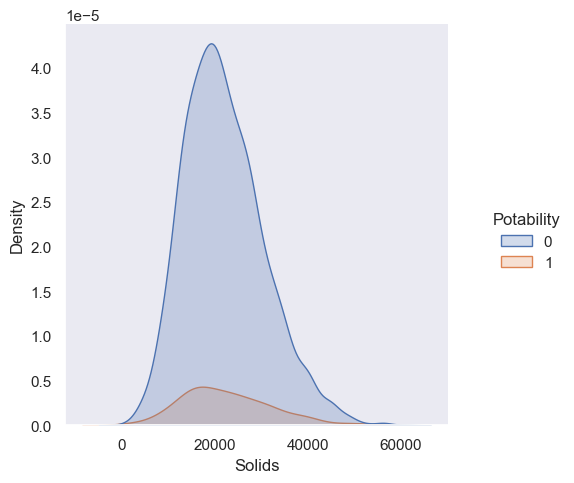

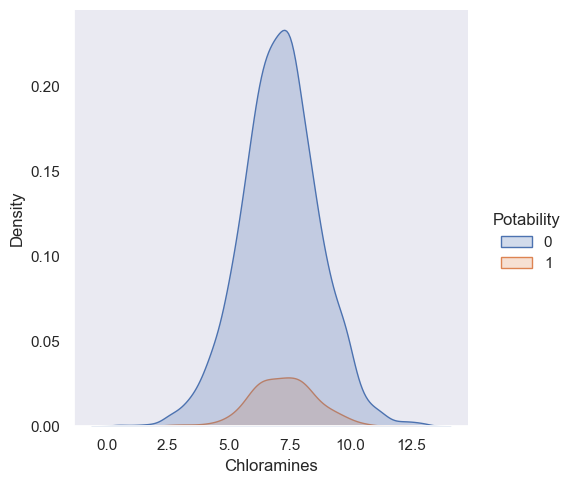

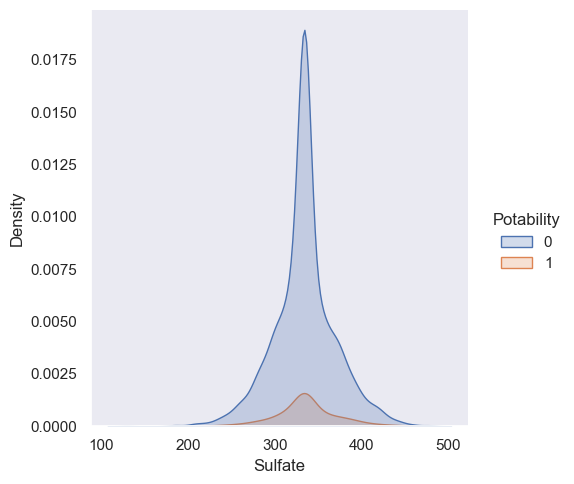

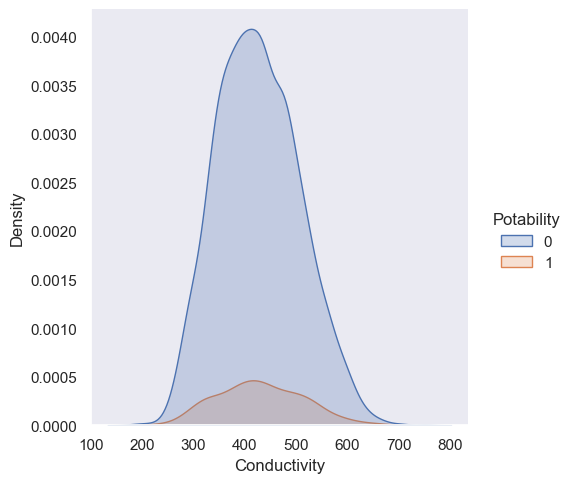

In [101]:
sns.displot(x=data['Solids'],hue=data['Potability'],kind='kde',fill=True)
sns.displot(x=data['Chloramines'],hue=data['Potability'],kind='kde',fill=True)
sns.displot(x=data['Sulfate'],hue=data['Potability'],kind='kde',fill=True)
sns.displot(x=data['Conductivity'],hue=data['Potability'],kind='kde',fill=True)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

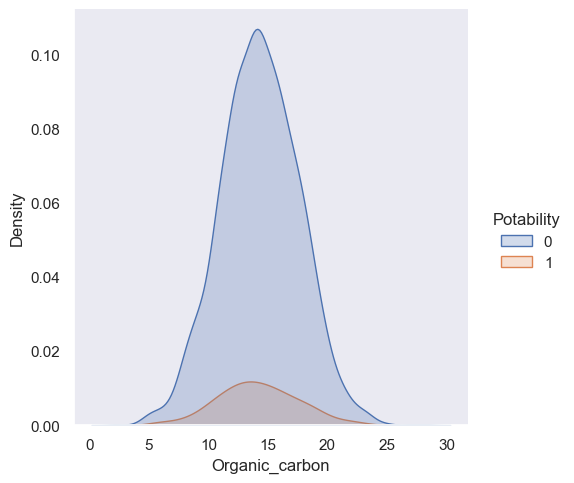

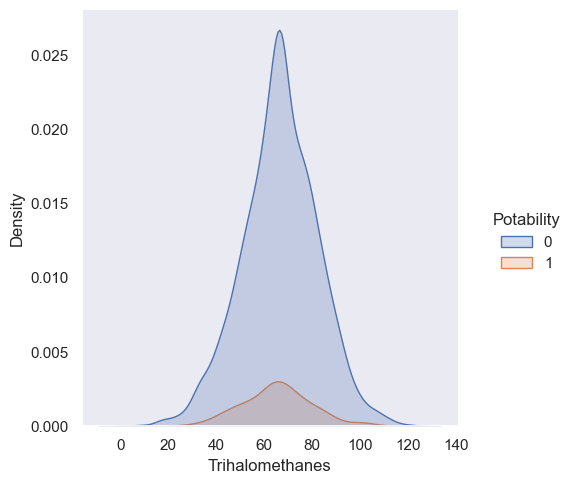

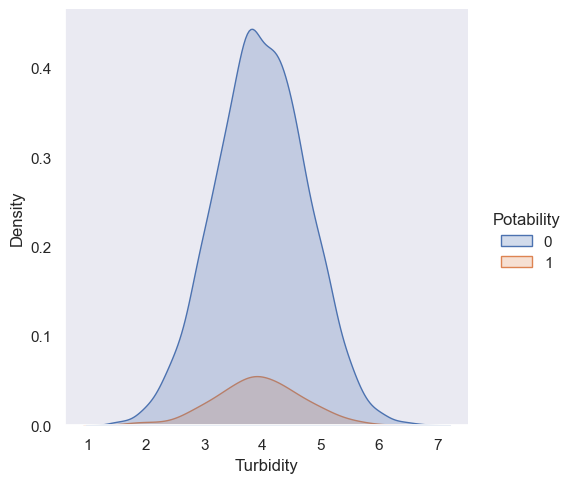

In [102]:
sns.displot(x=data['Organic_carbon'],hue=data['Potability'],kind='kde',fill=True)
sns.displot(x=data['Trihalomethanes'],hue=data['Potability'],kind='kde',fill=True)
sns.displot(x=data['Turbidity'],hue=data['Potability'],kind='kde',fill=True)

In [103]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [104]:
# extracting only the feature columns 
feature_col = data.copy()
feature_col.drop(columns = ['Potability'],inplace = True)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

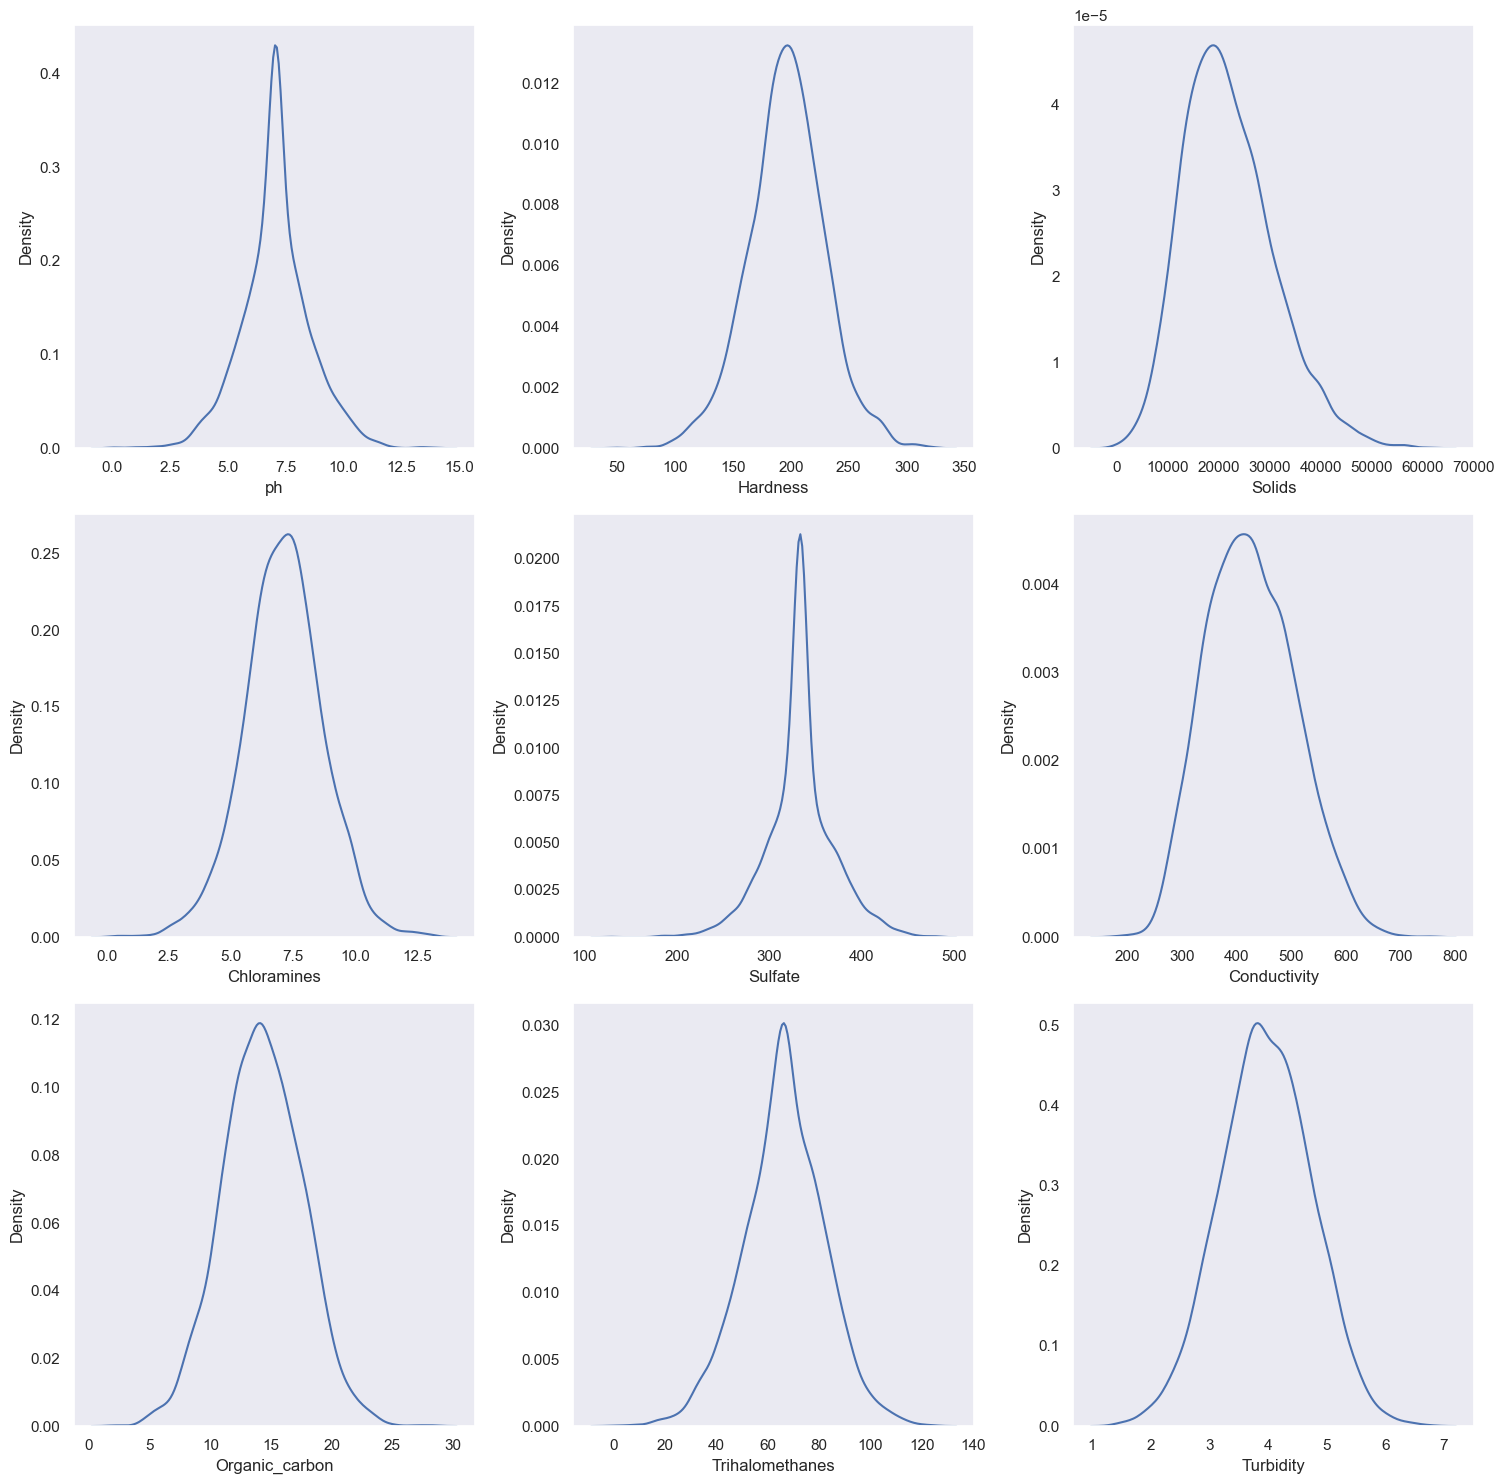

In [105]:
j=1
plt.figure(figsize = (15,15))
for i in feature_col.columns:
    plt.subplot(3,3,j)
    sns.kdeplot(feature_col[i])
    j=j+1
plt.tight_layout()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

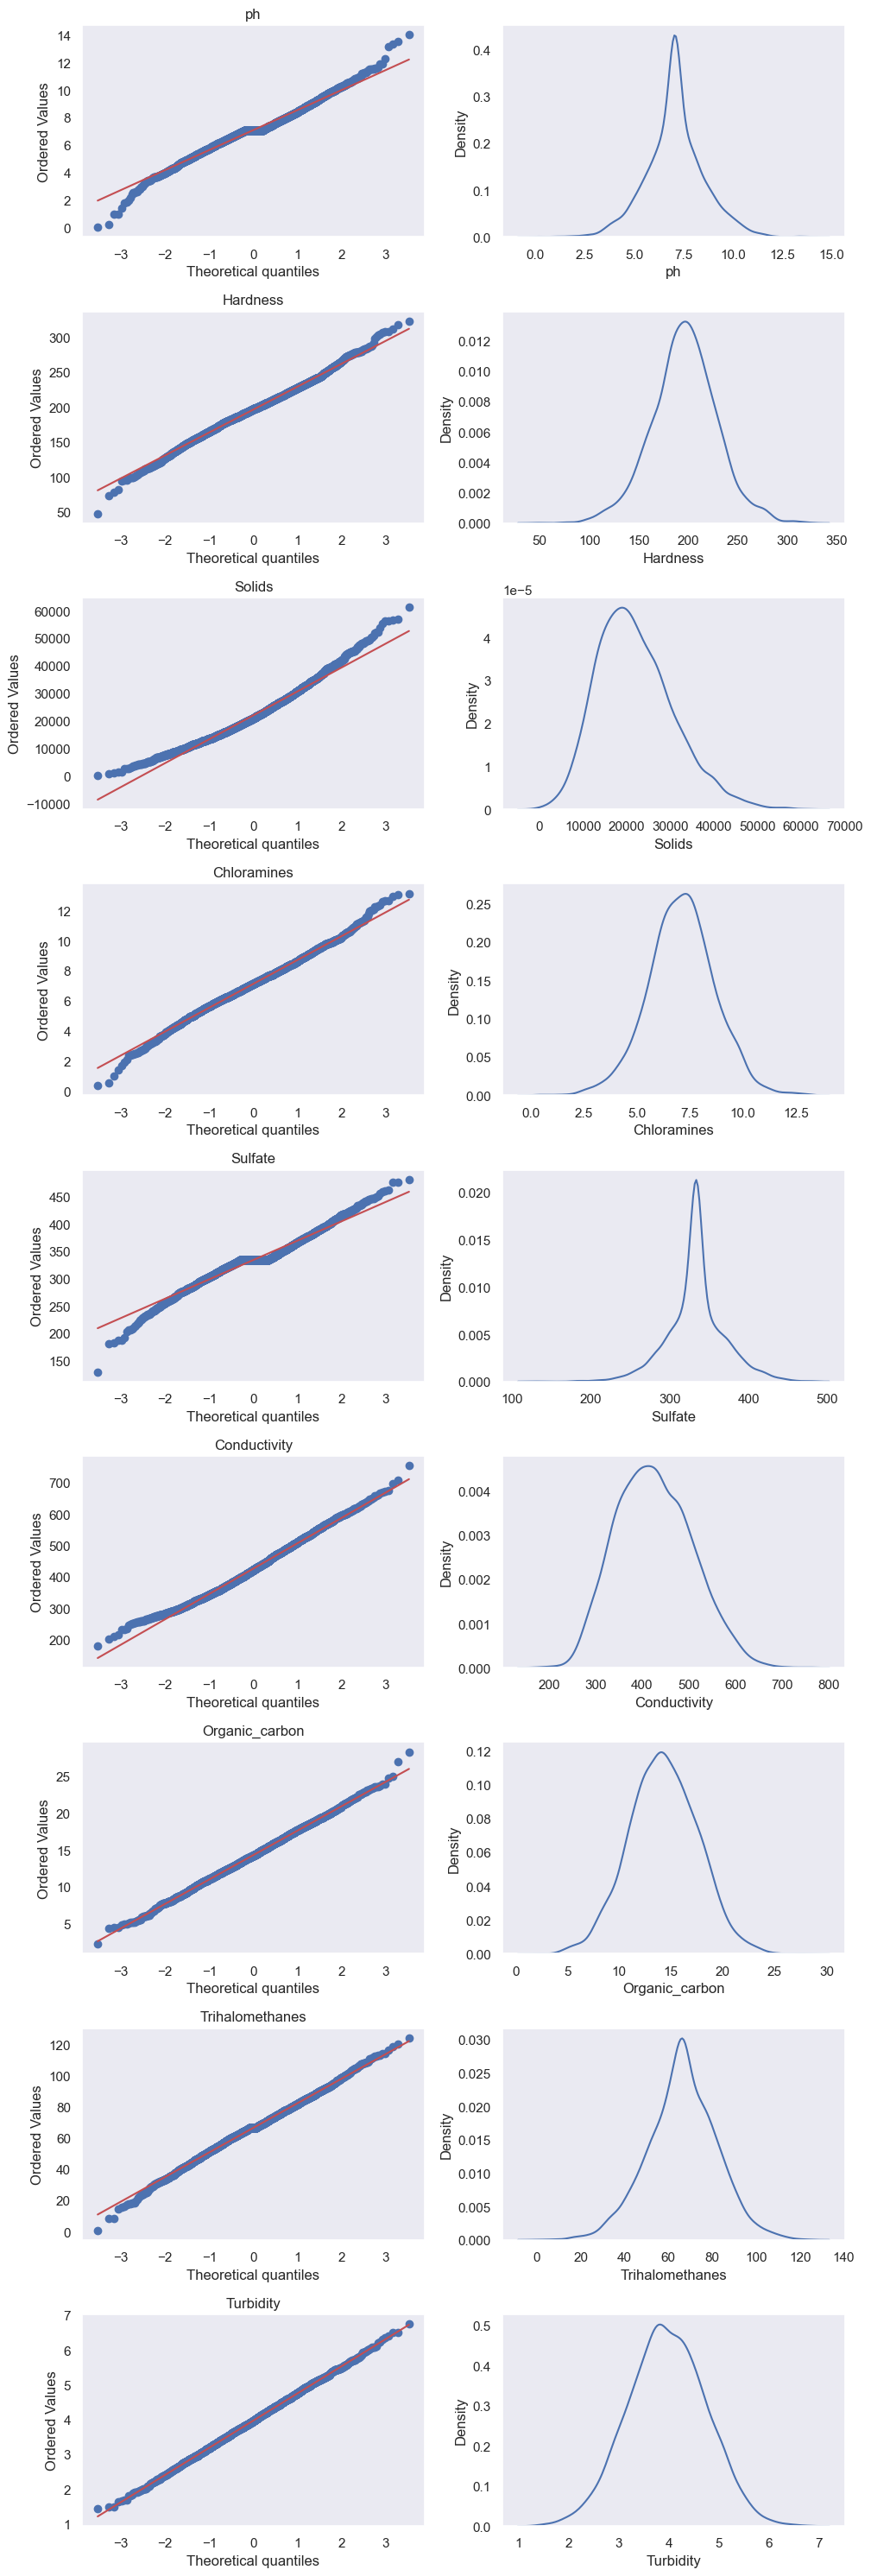

In [98]:
import scipy.stats as stats

j=1
plt.figure(figsize =(10,30))

for i in ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']:
    plt.subplot(9,2,j)
    stats.probplot(data[i],dist = 'norm',plot =plt)
    plt.title(i)
    j=j+1
    plt.subplot(9,2,j)
    sns.kdeplot(data[i])
    j=j+1
plt.tight_layout()

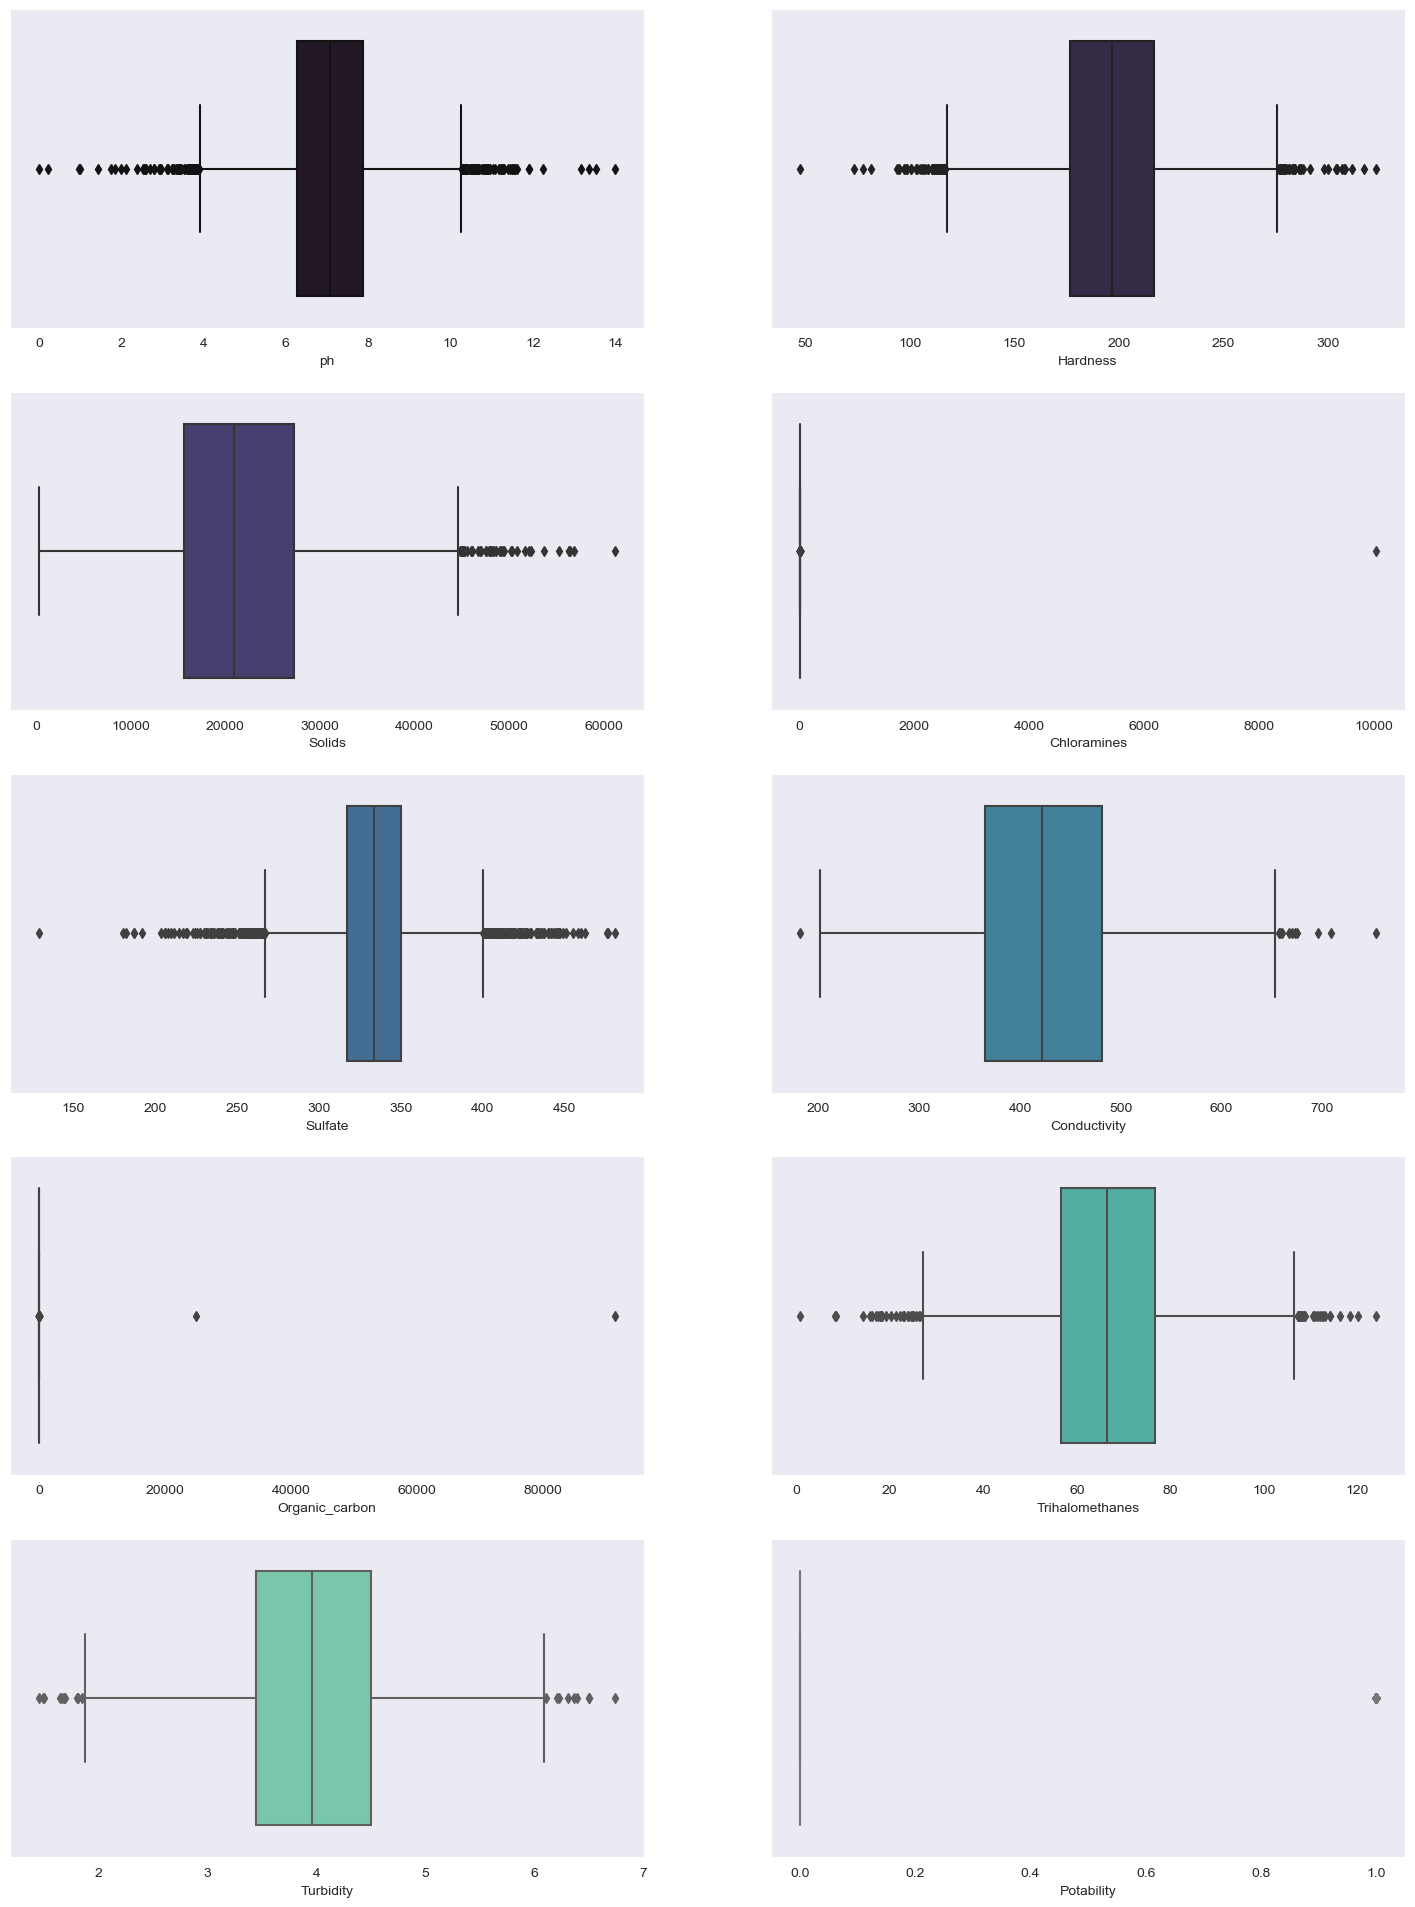

In [61]:
colors= sns.color_palette("mako", 10)
plt.figure(figsize=(18,24))
sns.set_style('dark')
i = 1
for col in data.columns:
    plt.subplot(5, 2, i)
    sns.boxplot(x=data[col], palette=colors[i-1:i])
    i+=1

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

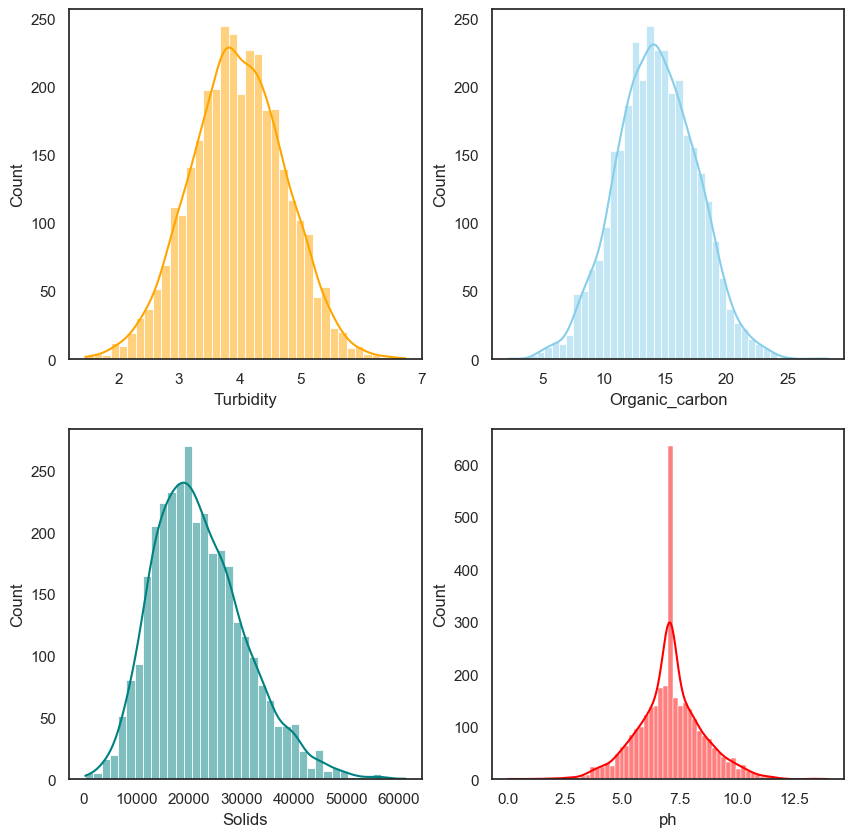

In [85]:
sns.set(style='white')
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=data, x='Turbidity', kde=True, color='Orange', ax=axs[0,0])
sns.histplot(data=data, x='Organic_carbon', kde=True, color='skyblue', ax=axs[0,1])
sns.histplot(data=data, x='Solids', kde=True, color='teal', ax=axs[1,0])
sns.histplot(data=data, x='ph', kde=True, color='red', ax=axs[1, 1])
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

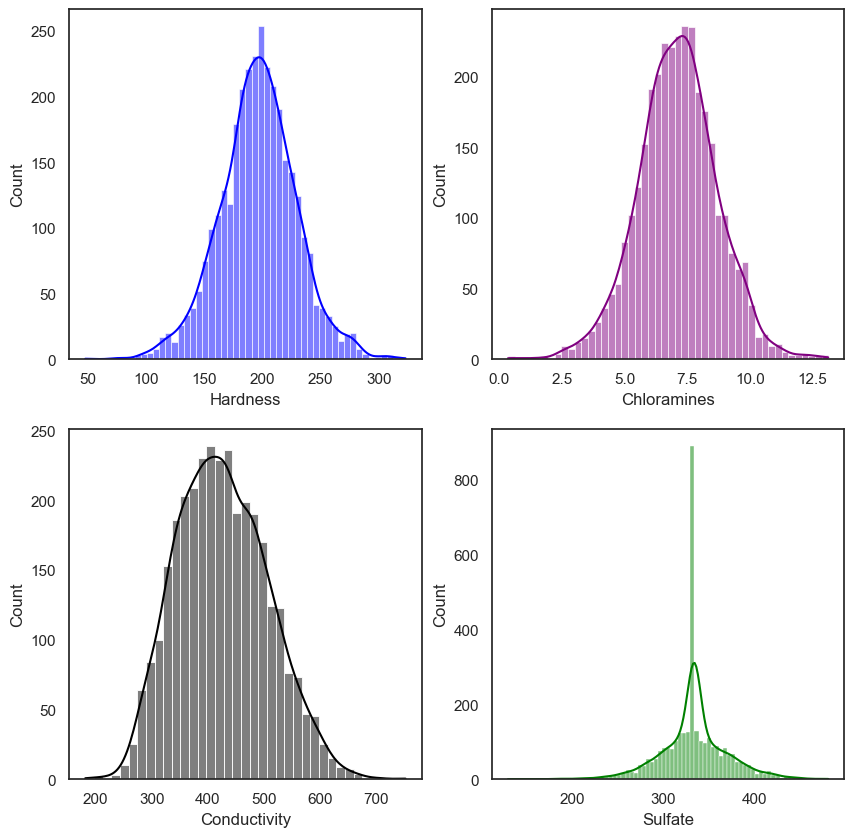

In [86]:
sns.set(style='white')
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=data, x='Hardness', kde=True, color='blue', ax=axs[0,0])
sns.histplot(data=data, x='Chloramines', kde=True, color='purple', ax=axs[0,1])
sns.histplot(data=data, x='Conductivity', kde=True, color='black', ax=axs[1,0])
sns.histplot(data=data, x='Sulfate', kde=True, color='green', ax=axs[1, 1])
plt.show()

In [87]:
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}', y=1.1)
    plot1 = sns.histplot(column, ax=ax0, color=color)
    plt.xlabel(ax0.get_xlabel())

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

In [88]:
from matplotlib.gridspec import GridSpec

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

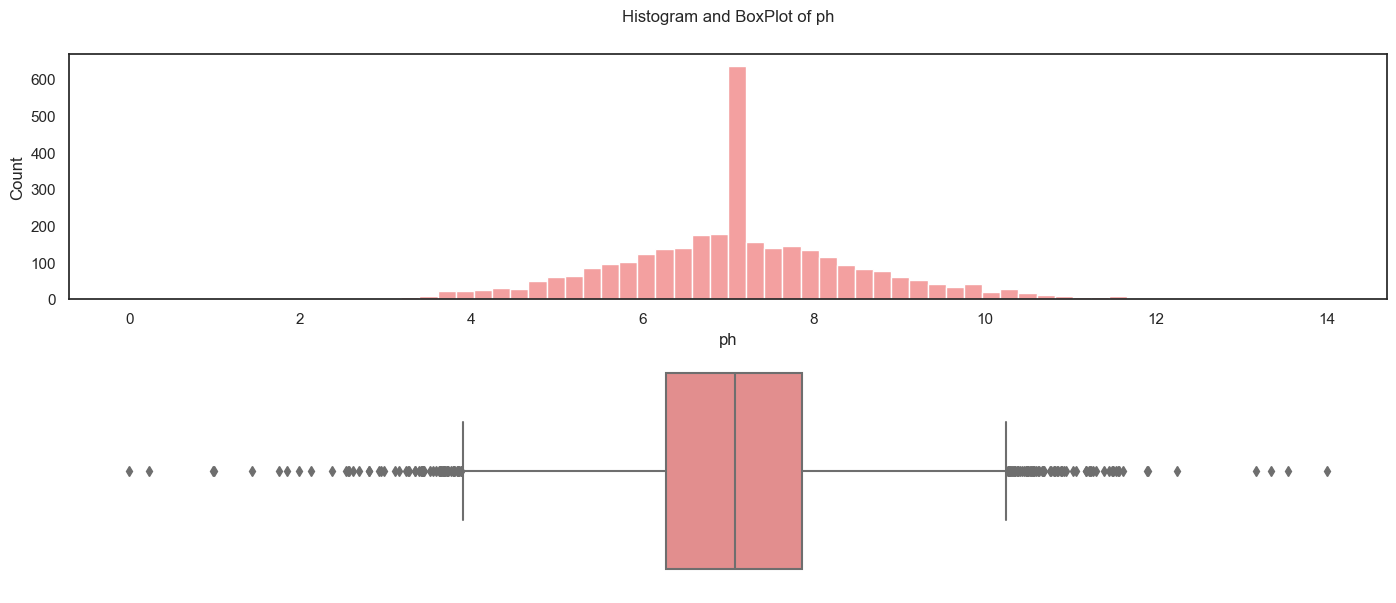

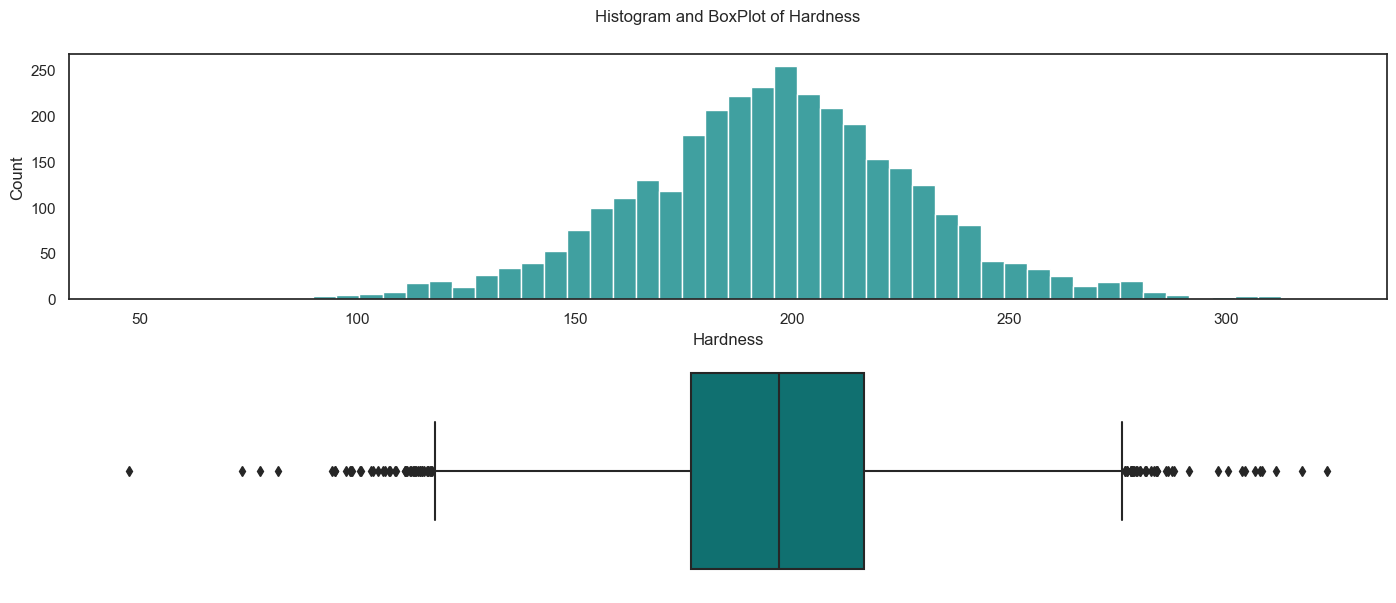

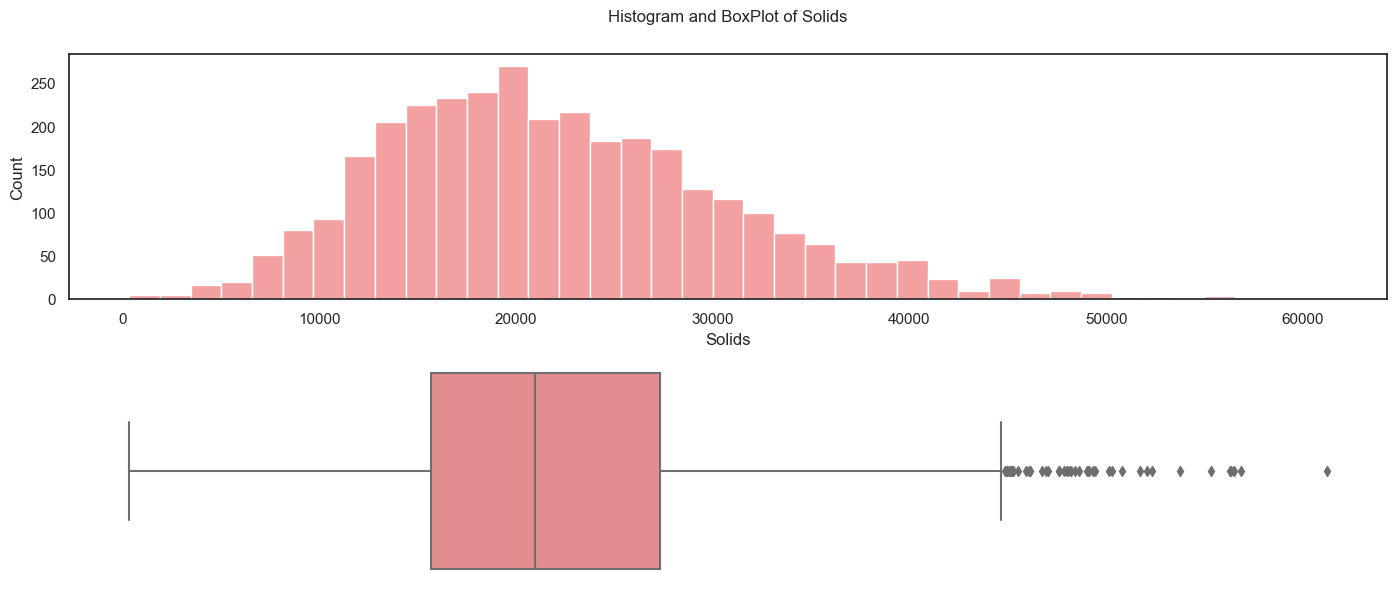

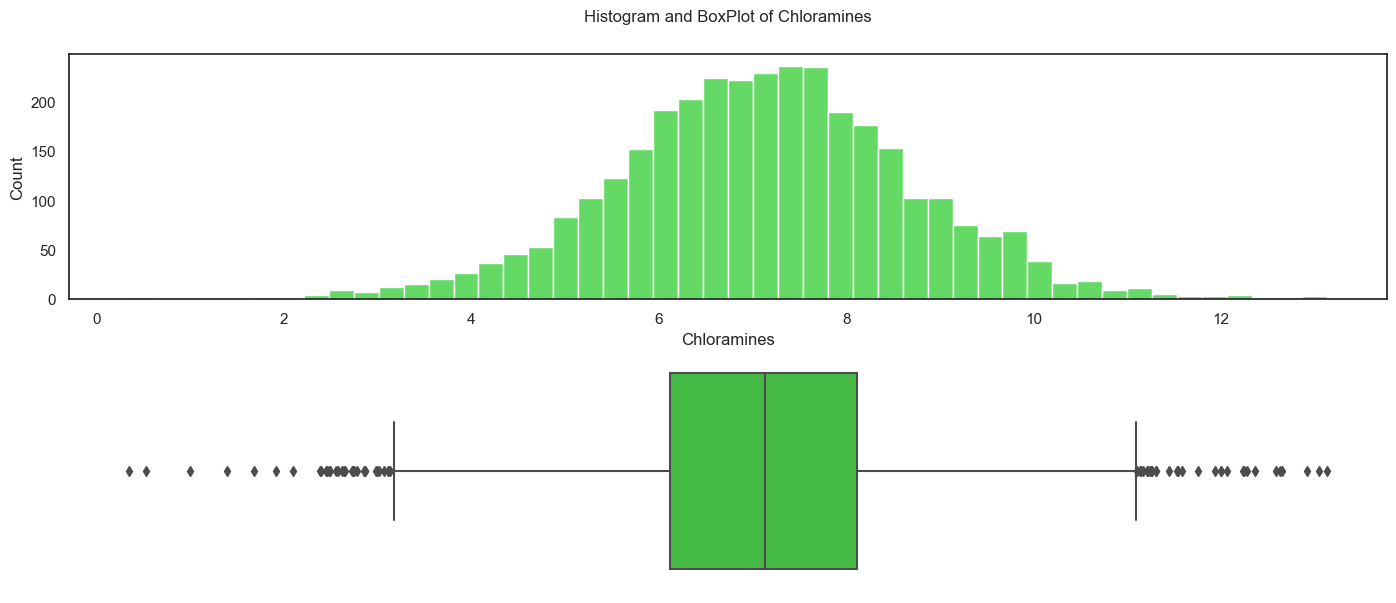

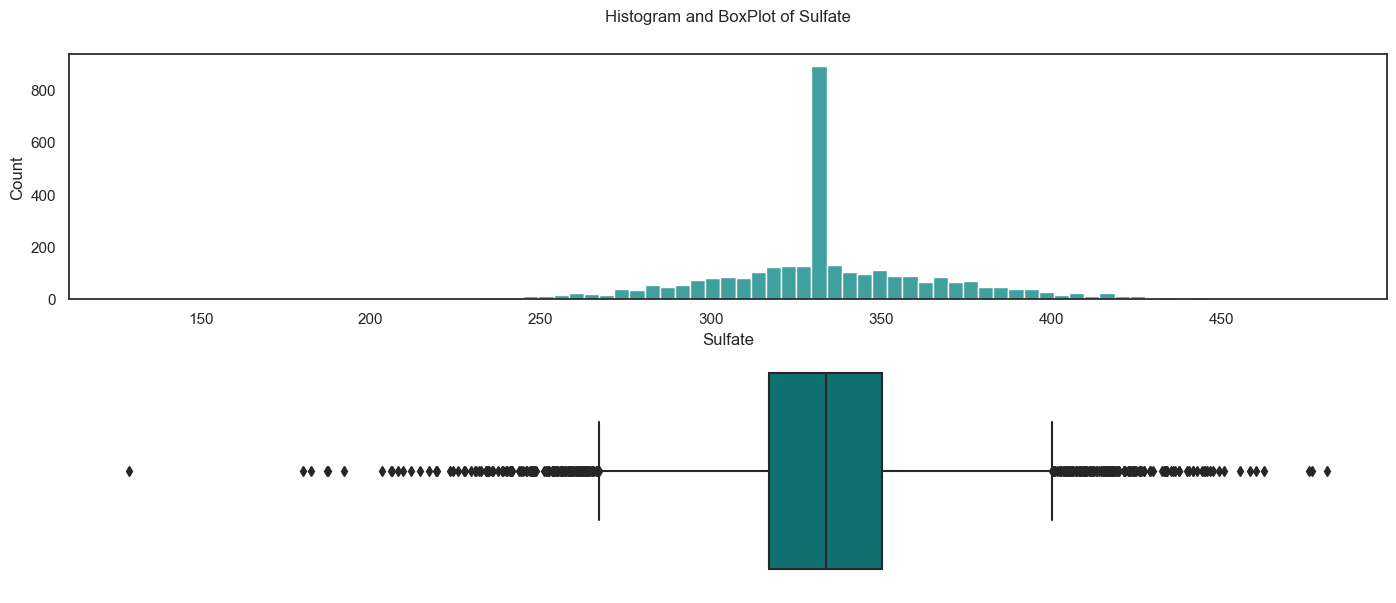

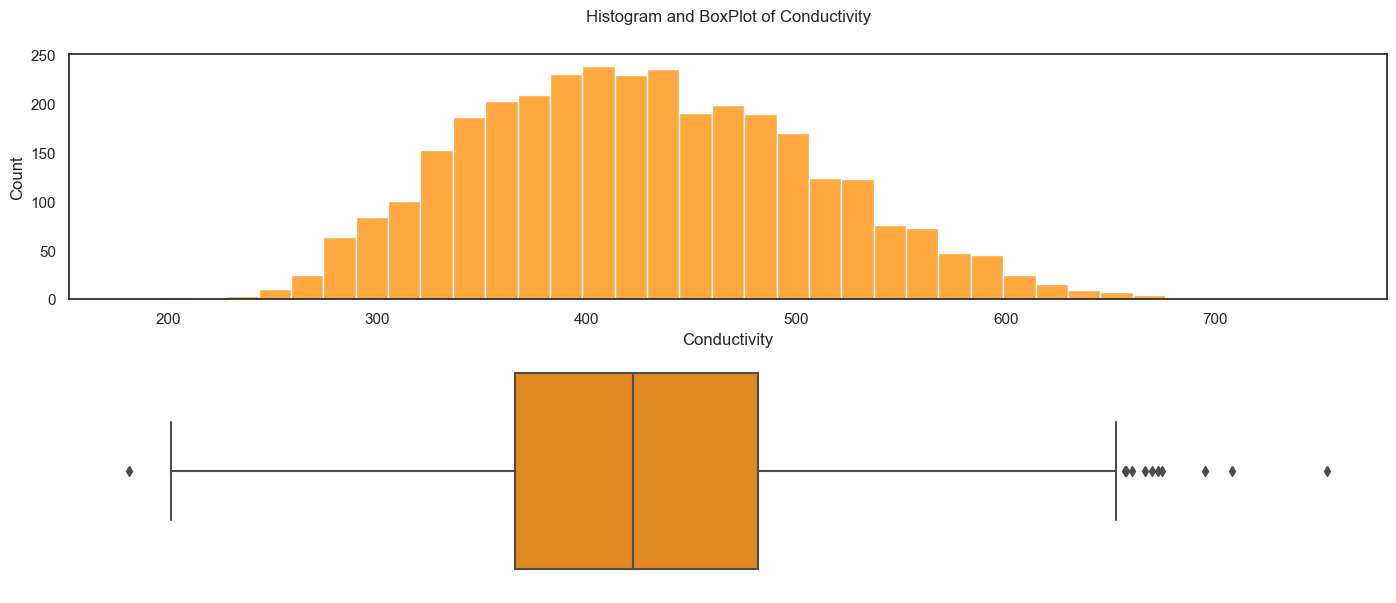

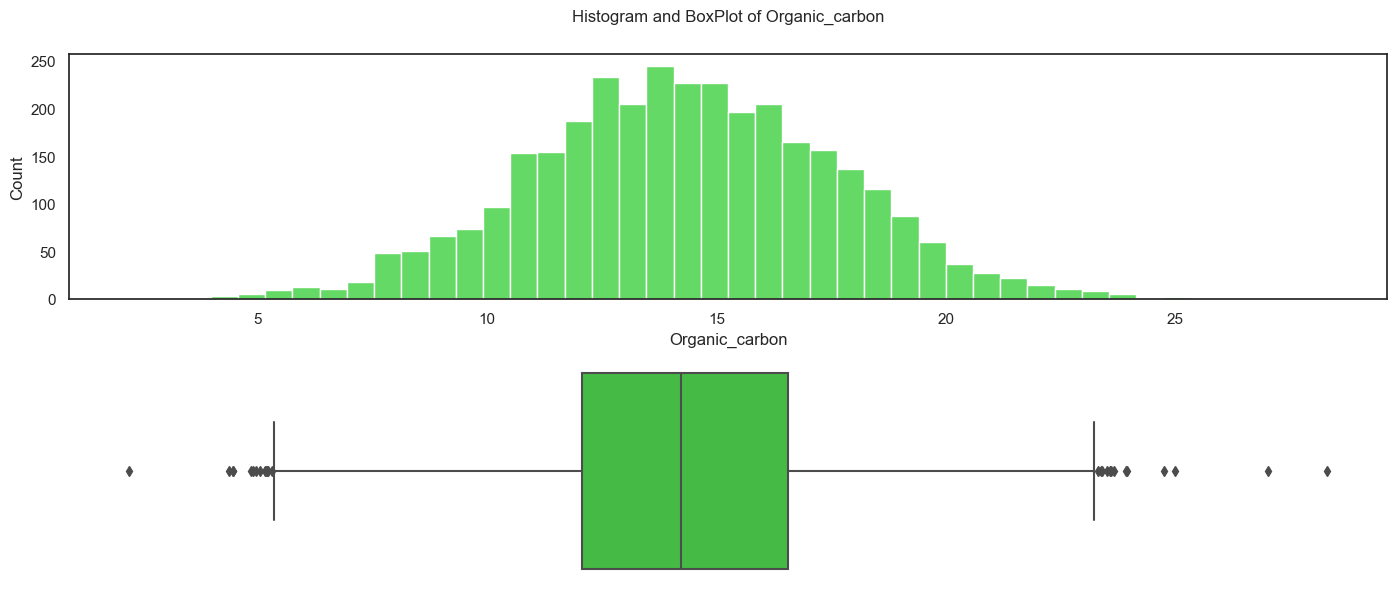

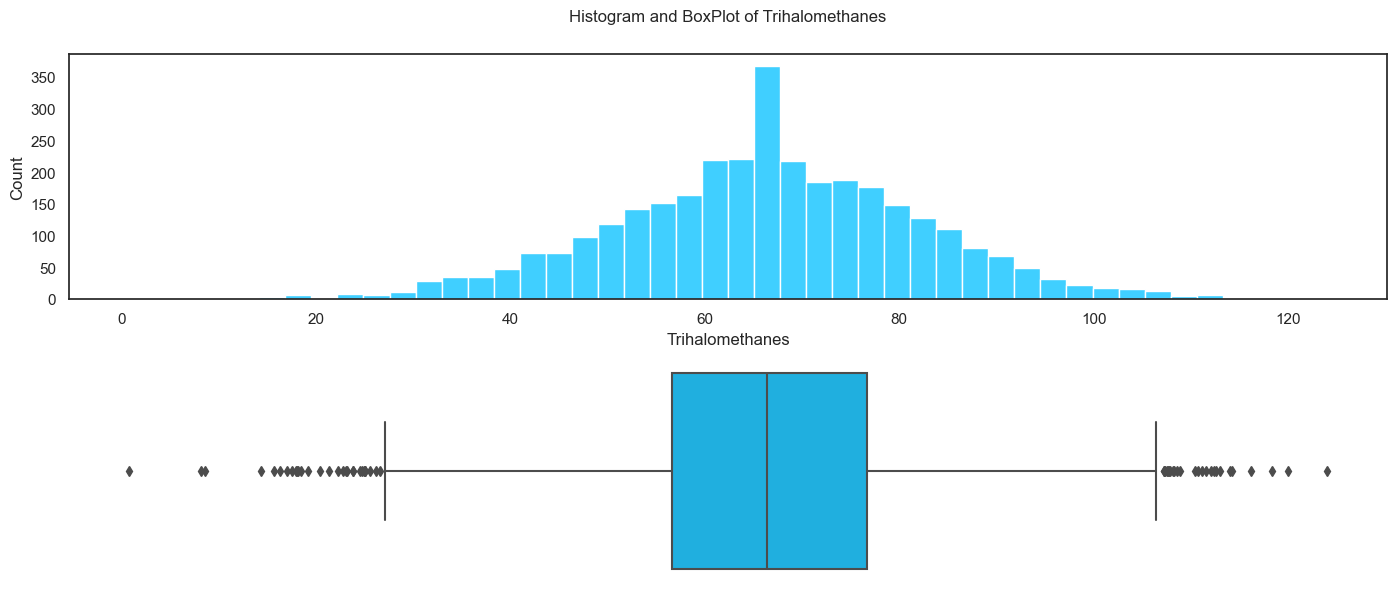

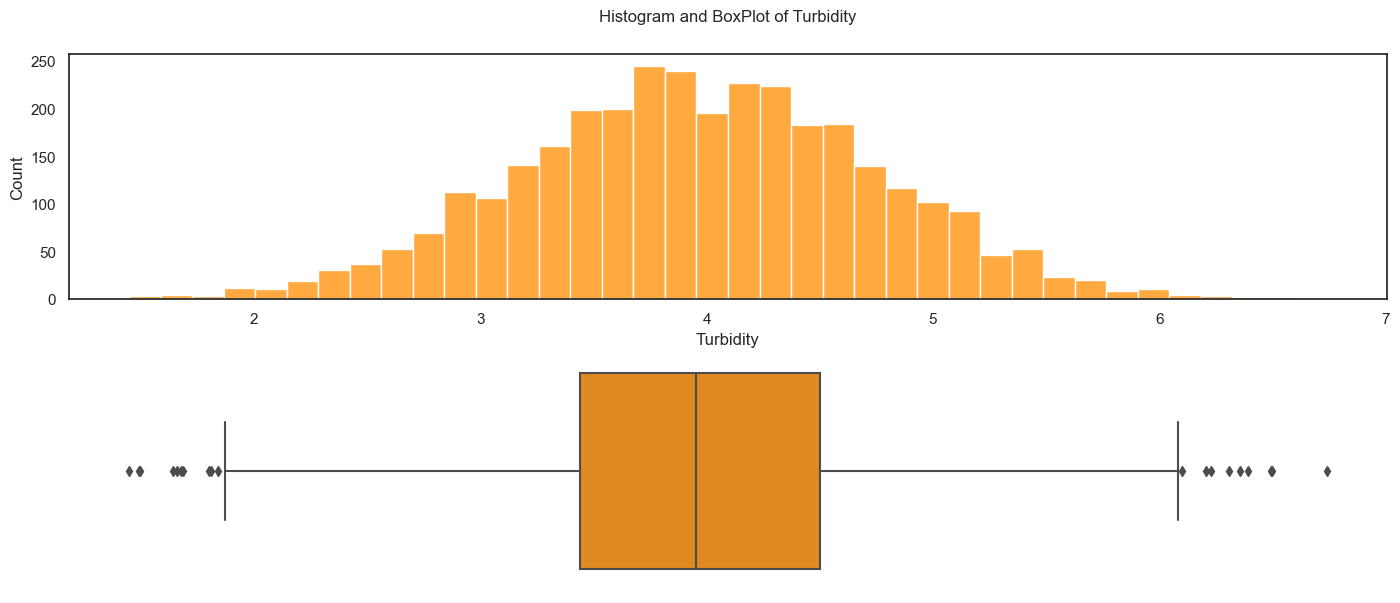

In [89]:
for col in data.drop(['Potability'], axis=1).columns:
    distribution_plot(data[col], col)

In [75]:
# Specify the columns for which you want to remove outliers
columns_to_remove_outliers = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    return data

# Remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(data, columns_to_remove_outliers)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

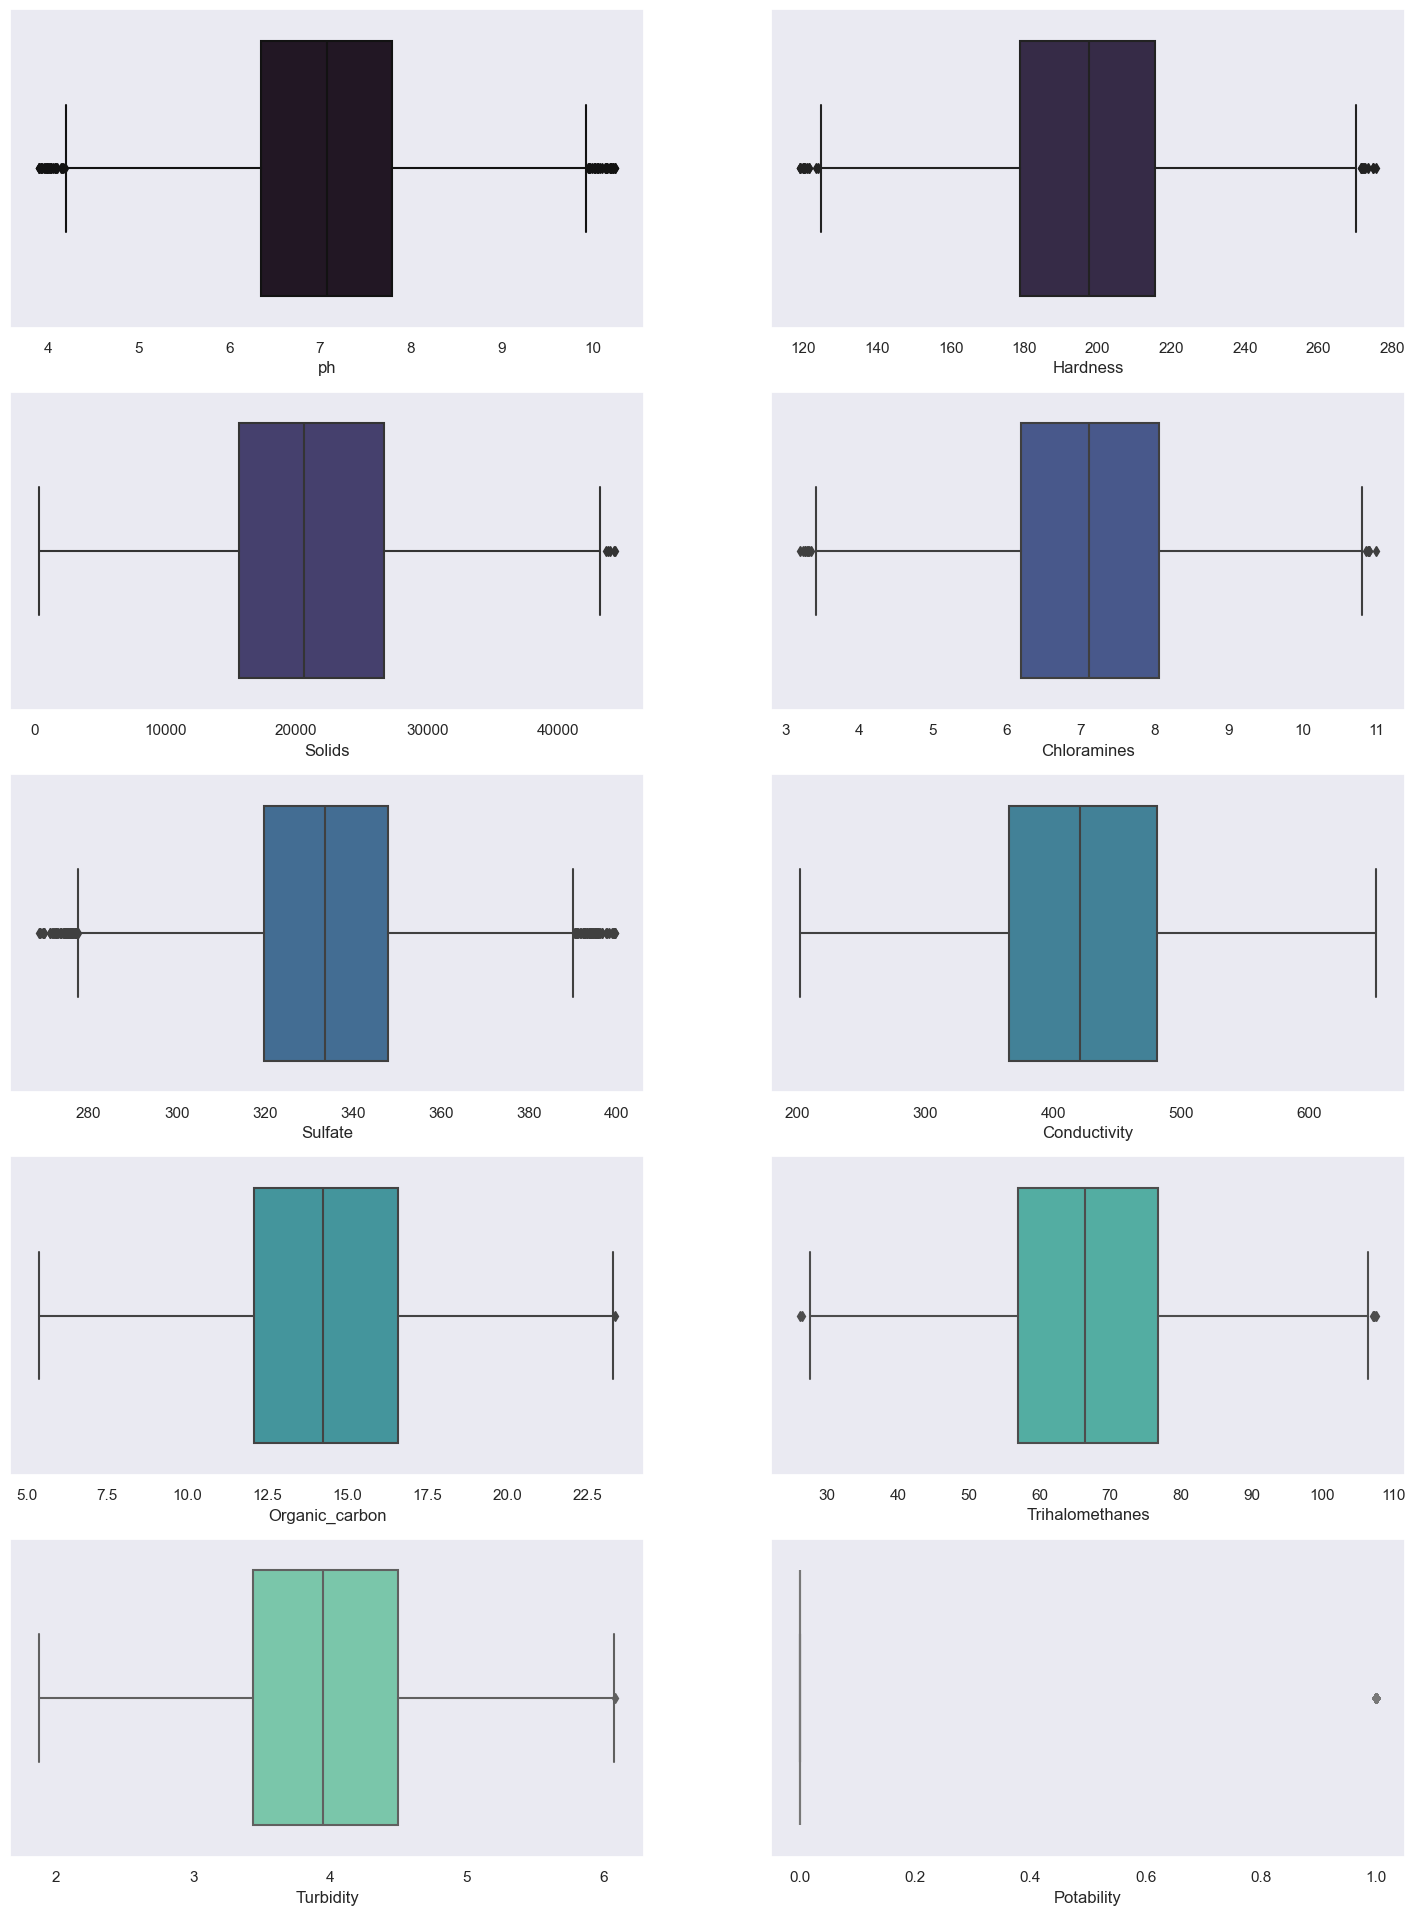

In [94]:
colors= sns.color_palette("mako", 10)
plt.figure(figsize=(18,24))
sns.set_style('dark')
i = 1
for col in df_cleaned.columns:
    plt.subplot(5, 2, i)
    sns.boxplot(x=df_cleaned[col], palette=colors[i-1:i])
    i+=1

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=["Potability"])
y = df_cleaned["Potability"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with balanced data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled["Potability"] = y_resampled

# Save the balanced data to a new CSV file
df_resampled.to_csv('balanced_data.csv', index=False)


In [77]:
df=pd.read_csv('balanced_data.csv')
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.845880  193.785000  13769.860240     9.007161  343.620823   
1     7.312109  199.812999  14540.735080     8.827414  276.118282   
2     6.968131  205.982582  19207.311770     7.285998  283.478555   
3     7.102447  243.412941  23493.120860     4.792738  283.344321   
4     7.776044  215.533795  38895.356140     7.764668  342.262498   
...        ...         ...           ...          ...         ...   
3801  6.443913  229.389698  16667.510346     5.849587  352.620062   
3802  7.564335  193.304934  30881.042351     7.596738  330.461163   
3803  6.394217  188.392113  26028.642029     7.224063  337.105326   
3804  7.391403  176.514236  34735.769918     7.025242  342.712980   
3805  8.519479  219.340077  15909.491522     6.314106  313.012972   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       510.305603       13.767802        99.175595   3.667154           0  
1       486.983734       17.271656        70.135608   5.123872           0  
2       459.176682       17.916964        50.878820   3.030824           0  
3       341.438781       16.072774        45.633295   3.065508           0  
4       349.431099        6.124625        65.832990   5.425946           0  
...            ...             ...              ...        ...         ...  
3801    418.451756        9.093366        61.537377   3.352852           1  
3802    454.992204       16.090498        71.469593   5.440552           1  
3803    445.798416       12.668435        68.090884   3.708069           1  
3804    345.370663        9.421444        57.373928   4.553629           1  
3805    384.303383       10.020796        56.200281   4.636742           1  

[3806 rows x 10 columns]

In [78]:
# Statue barred status Percentage
print('potable % is: ',df['Potability'].value_counts()[1]/len(data)*100,'%')
print('not potable % is: ',df['Potability'].value_counts()[0]/len(data)*100,'%')

potable % is:  58.08913308913309 %
not potable % is:  58.08913308913309 %


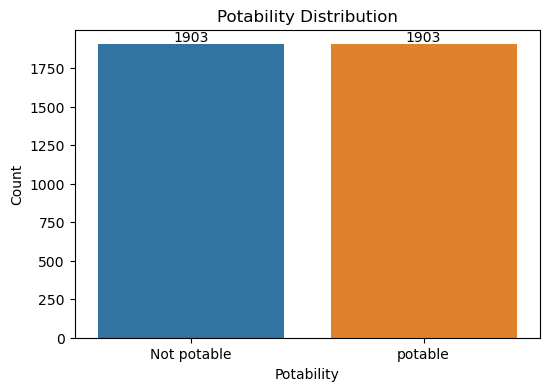

In [79]:
#Statute barrede status Distribution
plt.figure(figsize=(6,4))
ax=sns.countplot(data=df, x='Potability')
plt.title('Potability Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0,1], ['Not potable', 'potable'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [107]:
import sklearn
print(sklearn.__version__)


1.3.0


In [28]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [37]:
import imblearn


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [36]:
pip install imbalanced-learn==0.8.0  

     ---------------------------------------- 0.0/206.5 kB ? eta -:--:--
     - -------------------------------------- 10.2/206.5 kB ? eta -:--:--
     - -------------------------------------- 10.2/206.5 kB ? eta -:--:--
     - -------------------------------------- 10.2/206.5 kB ? eta -:--:--
     - -------------------------------------- 10.2/206.5 kB ? eta -:--:--
     ----------- ------------------------- 61.4/206.5 kB 233.8 kB/s eta 0:00:01
     ----------- ------------------------- 61.4/206.5 kB 233.8 kB/s eta 0:00:01
     ----------- ------------------------- 61.4/206.5 kB 233.8 kB/s eta 0:00:01
     ----------- ------------------------- 61.4/206.5 kB 233.8 kB/s eta 0:00:01
     --------------------- -------------- 122.9/206.5 kB 276.8 kB/s eta 0:00:01
     --------------------- -------------- 122.9/206.5 kB 276.8 kB/s eta 0:00:01
     --------------------- -------------- 122.9/206.5 kB 276.8 kB/s eta 0:00:01
     --------------------- -------------- 122.9/206.5 kB 276.8 kB/s eta

In [80]:
#importing necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier 

In [83]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Potability'])
Y = df['Potability']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
model1= RandomForestClassifier(random_state=42)
model1.set_params(criterion = 'gini',
                  max_features = None, 
                  max_depth = 12,
                 min_samples_leaf=1,min_samples_split=2)
model1.set_params(n_estimators=200,
                  bootstrap = True,
                  warm_start=False,
                 oob_score=True)
model1.fit(X_train,Y_train)
print(model1.score(X_train, Y_train))
y_pred=model1.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
cm

0.9336399474375822


array([[299,  84],
       [ 31, 348]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy=',accuracy)
precision=precision_score(Y_test,y_pred)
print('precision =',precision)
recall=recall_score(Y_test,y_pred)
print('recall=',recall)

accuracy= 0.8490813648293963
precision = 0.8055555555555556
recall= 0.9182058047493403
